In [1]:
import numpy as np

In [3]:
import pandas as pd

In [5]:
import tensorflow as tf

In [6]:
import matplotlib.pyplot as plt

In [37]:
from string import punctuation

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [116]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [180]:
from tensorflow.keras.models import Sequential

In [234]:
from tensorflow.keras.layers import CategoryEncoding, Input, Dense, SimpleRNN, StringLookup, Embedding

In [154]:
from sklearn.model_selection import train_test_split

In [19]:
nltk.download('punkt') # Necessário para word_tokenize
nltk.download('stopwords')
palavras_remover = set(stopwords.words())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
df = pd.read_csv("../../../dados/nlp/news_sentiment_analysis.csv", encoding="utf-8")

In [22]:
def limpar_texto( texto ):
    translator = str.maketrans('—’', '  ', punctuation)
    texto_limpo = texto.lower().translate( translator )
    tokens = word_tokenize(texto_limpo)
    tokens_limpos = []
    for token in tokens:
        if token not in palavras_remover:
            tokens_limpos.append(token)
    return " ".join(tokens_limpos)

In [25]:
MAX_PALAVRAS = 1000

In [55]:
df["TextoLimpo"] = df["Description"].apply(limpar_texto)

In [104]:
tokenizer = Tokenizer(num_words = MAX_PALAVRAS, oov_token="<UNKNOW>") # OOV = Out Of Vocabulary

In [106]:
tokenizer.fit_on_texts( df["TextoLimpo"] )

In [108]:
len(tokenizer.word_index)

20723

In [118]:
sequencias = tokenizer.texts_to_sequences(df["TextoLimpo"])

In [172]:
X = pad_sequences( sequencias, padding="pre" )

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

In [162]:
encoder_saida = CategoryEncoding( num_tokens = 7, output_mode="one_hot")

In [164]:
string_lookup_layer = StringLookup(output_mode="int")

# Adapt the layer to your data to create the vocabulary
string_lookup_layer.adapt( df["Type"] )

# 3. Use the StringLookup layer to convert strings to integer indices
integer_data = string_lookup_layer(df["Type"])
integer_data

<tf.Tensor: shape=(3500,), dtype=int64, numpy=array([7, 7, 7, ..., 1, 1, 1], dtype=int64)>

In [170]:
Y = encoder_saida( integer_data ).numpy()

In [176]:
X.shape

(3500, 71)

In [254]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=50)

In [308]:
modelo = Sequential()
modelo.add( Embedding( MAX_PALAVRAS, 12 ) )
# modelo.add( Input(  (71, 1, )  ) )
modelo.add( SimpleRNN( 12 ) )
modelo.add( Dense( 32, activation="relu" ) ) 
modelo.add( Dense( 7, activation="softmax" ) )
modelo.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_19 (SimpleRNN)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [310]:
modelo.compile( optimizer = "adam", loss="categorical_crossentropy", metrics=["Accuracy"] )

In [312]:
historico = modelo.fit( X_train, Y_train, epochs=10, batch_size=32 )

Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - Accuracy: 0.1957 - loss: 1.6496
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - Accuracy: 0.2868 - loss: 1.4794
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - Accuracy: 0.4498 - loss: 1.2088
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - Accuracy: 0.5602 - loss: 0.9683
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - Accuracy: 0.6332 - loss: 0.7606
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - Accuracy: 0.6704 - loss: 0.6327
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - Accuracy: 0.6805 - loss: 0.5993
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - Accuracy: 0.6022 - loss: 0.8006
Epoch 9/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - Accuracy: 0.5573 - loss: 0.8708
Epoch 10/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - Accuracy: 0.5088 - loss: 0.9698


In [298]:
acuracia = historico.history["Accuracy"]
perda = historico.history["loss"]
acuracia_norm = np.array(acuracia) / 1.0
perda_norm = perda / np.max(perda)

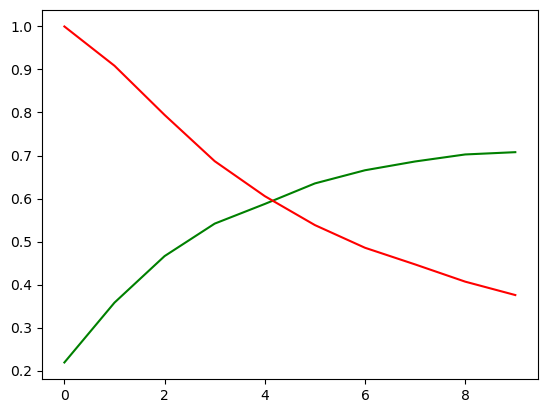

In [300]:
plt.plot(acuracia_norm, color="green")
plt.plot(perda_norm, color="red")